# General Instructions

Students are allowed to work on this exercise in pairs. Make sure you have formed a group in Canvas with your partner. Each student is responsible for following the [Code of Conduct](https://kth.instructure.com/courses/32018/pages/code-of-conduct). In particular (1) All members of a group are responsible for the group's work, (2) Every student shall honestly disclose any help received and sources used, and (3) Do not copy from other people's solutions.

If you need assistance with the exercise, you are encouraged to post a question to the appropriate [Discussion Topic](https://kth.instructure.com/courses/32018/discussion_topics) or sign up for a help session.

<br>

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `raise NotImplementedError()` once you have implemented the solution

<br>

You should not import any libraries on top of the ones included in the assignment. Derivation questions can be answered using $\LaTeX$, or you may upload an image of your derivation. To do so in *Google Colab* simply create a text cell, click on the `insert image` icon, and upload an image to the notebook as we have demonstrated below.

<br>

**Submission** - once you have completed the exercise make sure everything runs as expected by going into `Runtime` -> `Restart and Run all` then download the notebook by clicking `file` -> `download` -> `download .ipynb`. Then **rename the file to include your name** (and **your partner's name** if you have one) as follows

<br>

`Ex??_LASTNAME_FIRSTNAME_and_LASTNAME_FIRSTNAME.ipynb`

<br>

where you replace `??` with the correct exercise number. If you are working alone you do not need to include a partner name. Correctly naming the file and including your name (and your partner's) below is worth **1 point** - if you fail to correctly name the file or include your partner's name, *you will lose this point*.

<br>

Good luck!

# Name (1 pts)
**Fill in your name and your partner's name below** (and name the `.ipynb` file correctly): <font color="red"> (1 Point) </font>


### Student: DAROUS, ROMAIN


# Exercise 6: Machine learning and kernel methods (25 Points Total)

In this exercise, we will work practically with the Kernelization of Linear Regression that we discussed in the lecture notes.  

In [1]:
# General imports for the exercise
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Fixing the random seed for reproducibility
RANDOM_SEED=4321
np.random.seed(RANDOM_SEED)

# 9. Kernel Linear Regression (6P)

**9.1** Use the definition of a kernel to explain why kernels are symmetric: $k(x,x') = k(x',x)$. What underlying property is the reason? 1 sentence answer is enough. $\color{red}{\text{(2 point)}}$

A kernel can be expressed as an inner product, which is symmetric : <br>
$k(x,x') = \langle \phi(x), \phi(x') \rangle = \langle \phi(x'), \phi(x) \rangle = k(x',x)$.

**9.2** One way to check if a given function is a kernel is to show that it can be decomposed into the inner product in some feature space, i.e. $\langle \phi(x), \phi(x') \rangle$. Given a two-dimensional real-valued input space $x=(x_1, x_2)$, show that $k(x,x')= (x^T x')^2$ is a valid kernel by identifying the corresponding feature map $\phi(x).$  $\color{red}{\text{(4 points)}}$

We have that : <br>

$k(x, x') = (x^T x')^2 = (x_1x_1' + x_2x_2')^2$

Let's denote : <br>

$\phi(x) = (x_1^2, \sqrt{2}x_1x_2, x_2^2)$

We have that : <br>

$\langle \phi(x), \phi(x') \rangle = x_1^2x_1'^2 + 2x_1x_2x_1'x_2' + x_2^2x_2'^2 = (x_1x_1' + x_2x_2')^2 = k(x, x')$.

Hence, we get the result.

Consider the dataset that is plotted when you run the next cell. Our goal will be to implement ourselves both primal and dual versions of kernelized regression in order to find a good fit to this data and test our understanding.

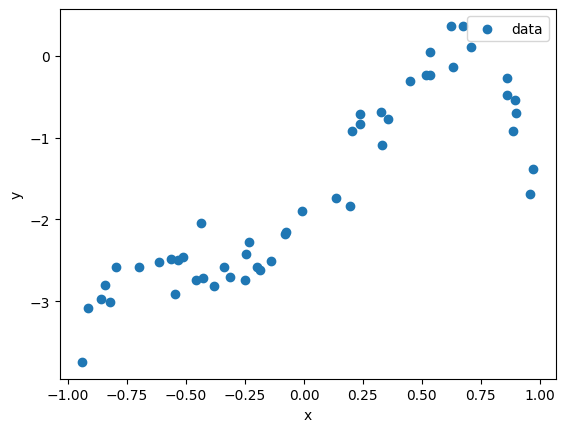

In [2]:
# Generate noisy observations
gen_data = lambda t, c : np.sum([a * (t[:,0]**i) for i, a in enumerate(c)], axis=0)

n = 50
coeff = [-2, 3, 4, -2,-5]
X = np.random.uniform(-1.0, 1.0, n).reshape(-1,1)
y = gen_data(X, coeff) + np.random.normal(0.0, 0.2, n)

# Plot data
plt.scatter(X, y, label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**9.3**  Take a look at the documentation of `sklearn.kernel_ridge.KernelRidge` online. This module implements the dual kernelized linear regression we discussed in the lectures.

a) Complete the function `fit_ridge` below to returns the trained model following the documentation of sklearn.kernel_ridge.KernelRidge. Use the next cell after to visualize what this function does. Use a polynomial kernel. $\color{red}{\text{(2 points)}}$

b) What parameters for degree d and l yield a good fit? $\color{red}{\text{(2 points)}}$

c) What happens if you now increase or decrease the value of l?  $\color{red}{\text{(1 point)}}$

d) What polynomial p(x) do we converge to as the regularization parameter l tends to +infinity? $\color{red}{\text{(1 point)}}$

- b : ``l = 0.05`` and ``d = 8`` seem to yield a good fit
- c : Decreasing the regularization parameter makes the model fit closer to the data. On the contrary, increasing it gives a smoother model, that is less sensitive to noise of the data.
- d : when making ``l`` tend to infinity, the model converges to the polynomial $p(x) = 0$.

In [3]:
from sklearn.kernel_ridge import KernelRidge

def fit_ridge(X, y, l, d):
    """
    X: np.ndarray of shape [N, 1]
    y: np.ndarray of shape [N]
    l: regularization parameter: real value
    d: degree of polynomial
    Returns:
        model: object of type KernelRidge
    """

    # YOUR CODE for a) HERE (hint: you can do it in just 2 lines)
    model = KernelRidge(alpha=l, kernel='polynomial', degree=d)
    model = model.fit(X, y)

    return model

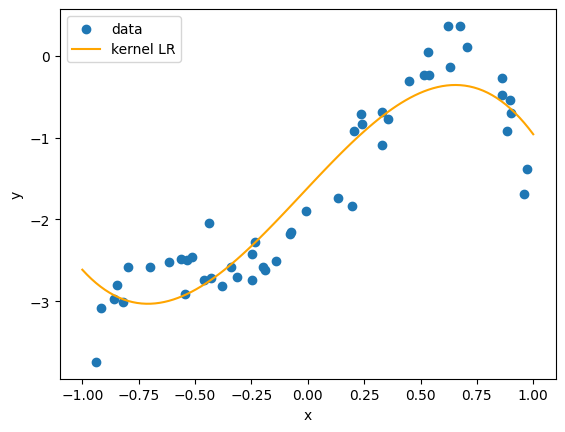

In [4]:
# Predict for interval (-1.0, 1.0)
X_pred = np.linspace(-1.0, 1.0, 100).reshape(-1,1)
# Set your regularization parameter here:
l = 0.1
degree= 3
# Fit kernel regression model
y_pred_kernel = fit_ridge(X, y, l, degree).predict(X_pred)


# Plot results
plt.scatter(X, y, label="data")
plt.plot(X_pred, y_pred_kernel, c='orange', label="kernel LR")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

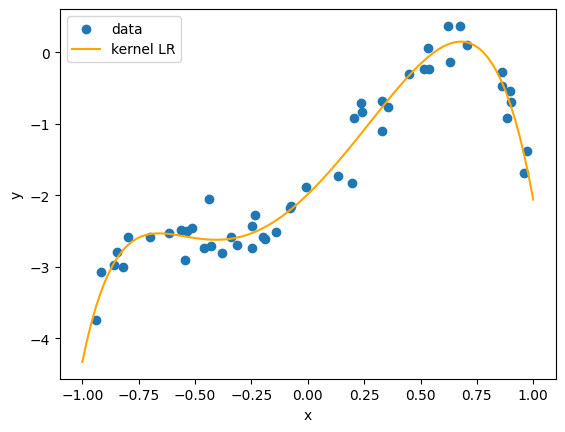

In [5]:
# Predict for interval (-1.0, 1.0)
X_pred = np.linspace(-1.0, 1.0, 100).reshape(-1,1)
# Set your regularization parameter here:
l = 0.05
degree= 8
# Fit kernel regression model
y_pred_kernel = fit_ridge(X, y, l, degree).predict(X_pred)


# Plot results
plt.scatter(X, y, label="data")
plt.plot(X_pred, y_pred_kernel, c='orange', label="kernel LR")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

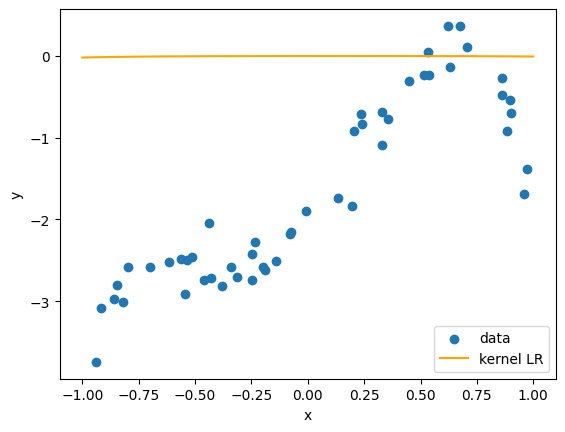

In [6]:
# Predict for interval (-1.0, 1.0)
X_pred = np.linspace(-1.0, 1.0, 100).reshape(-1,1)
# Set your regularization parameter here:
l = 200000
degree= 8
# Fit kernel regression model
y_pred_kernel = fit_ridge(X, y, l, degree).predict(X_pred)


# Plot results
plt.scatter(X, y, label="data")
plt.plot(X_pred, y_pred_kernel, c='orange', label="kernel LR")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**9.4** Let us implement our own version of fit_ridge from scratch using the formulas for the optimal parameters $\theta$ that we derived in the notes. Hint: use np.eye(n) to create an identity matrix of size n by n.
The function Phi below already implements the matrix Phi for the polynomials of up to degree d feature maps from the lecture notes.

a) Implement theta_primal which returns the optimal theta vector from the lecture using the primal solution for linear regression with a feature map. ${\text{(2 points)}}$

b) Implement theta_dual which implements the optimal theta vector from the lecture using the dual solution for the linear regression with a feature map. This should give the same result as theta_primal, of course. ${\text{(2 points)}}$

c) Use the prepared code in the next two cells to compute y_pred_primal: the predicted y values from the theta_primal and y_pred_dual: the predicted y values from theta_dual. You should obtain two identical plots which are very similar to the plot above (at least for small regularization). ${\text{(2 points)}}$





In [7]:
from sklearn.preprocessing import PolynomialFeatures

def Phi(X, d):
    """
    X: np.ndarray of shape [N, 1]
    Returns:
      Phi matrix from lecture corresponding to polynomial feature map,
      np.ndarray of shape [N, d+1]
    """
    poly = PolynomialFeatures(d)
    return poly.fit_transform(X)


def theta_primal(Phi, Ys, l):
    """
    Phi: our matrix Phi as in the lecture notes containing rows of phi(x_i) shape [N, k]
    Ys: predicted Y values of shape [N]
    l: real valued regularization parameter
    Returns: Optimal primal solution to theta, vector in dimension k
    """
    # YOUR_CODE_HERE (can be done in 1-2 lines, but you can expand also)
    return np.linalg.inv(Phi.T @ Phi + l * np.eye(Phi.shape[1])) @ Phi.T @ Ys

def theta_dual(Phi, Ys, l):
    """
    Phi: our matrix capital Phi as in the lecture notes containing rows of phi(x_i) shape [N, k]
    Ys: predicted Y values of shape [N]
    l: real valued regularization parameter
    Returns: Optimal primal solution to theta, vector in dimension k
    """
    # YOUR_CODE_HERE (can be done in 1-2 lines, but you can expand also)
    return Phi.T @ np.linalg.inv(Phi @ Phi.T + l * np.eye(Phi.shape[0])) @ Ys

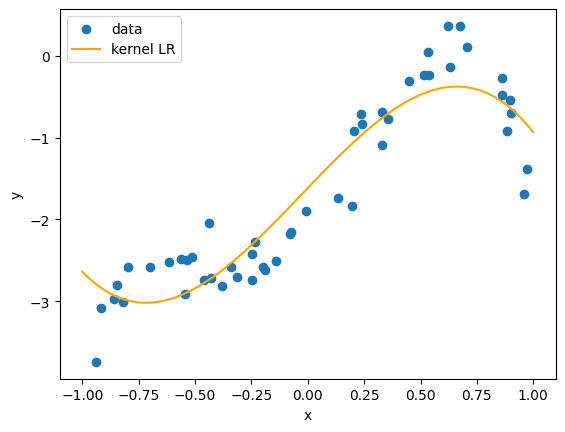

In [8]:
# Predict for interval (-1, 1)
X_pred = np.linspace(-1.0, 1.0, 100).reshape(-1,1)
# Set your regularization parameter here:
l = 0.1
degree= 3
# implement the estimated function value computation at X_pred: y_pred_primal = ... (should involve theta_primal)
y_pred_primal = Phi(X_pred, degree) @ theta_primal(Phi(X, degree), y, l)
# Plot results
plt.scatter(X, y, label="data")
plt.plot(X_pred, y_pred_primal, c='orange', label="kernel LR")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

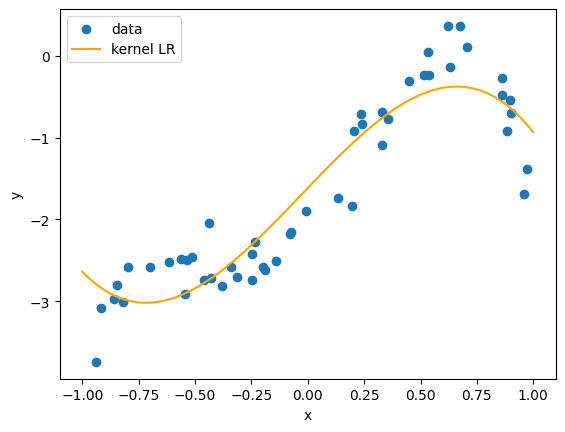

In [9]:
# Predict for interval (-1, 1)
X_pred = np.linspace(-1.0, 1.0, 100).reshape(-1,1)
# Set your regularization parameter here:
l = 0.1
degree = 3
# implement the estimated function value computation at X_pred: y_pred_ = ... (should involve theta_primal)
y_pred_dual = Phi(X_pred, degree) @ theta_dual(Phi(X, degree), y, l)
# Plot results
plt.scatter(X, y, label="data")
plt.plot(X_pred, y_pred_dual, c='orange', label="kernel LR")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**9.5** In the last exercise we have seen practically that both primal and dual solutions to the optimal theta parameter from the lecture notes indeed yield the same result. Now we focus on the dual formulation and rewrite it using the kernel trick so that we can work with kernel functions directly.

Have a look at the skeleton code below. It implements the solution of kernel regression using the kernel trick.

a) Implement the function Gram that computes a Gram matrix for an input kernel function depending on a parameter as described. ${\text{(2 points)}}$

b) Implement the function kernel_poly. The resulting plot for identical degree and regularization parameters as before should look as the result in the code that used kernel ridge regression from the python ligrary but this time we computed it ourselves using only kernel evaluations. ${\text{(2 points)}}$

c) Implement the function kernel_gauss. Experiment with different sigma values - can you find suitable values and what is the result of changing these?  ${\text{(2 points)}}$

- c : As we can see below, increasing ``sigma`` makes the model less sensitive to the noise of the data. We get a smoother approximation of the underlying structure of the data points, until some point where it underfits. On the contrary, when it gets lower, the model tends to reach every data points, and it clearly overfits the data.

In [10]:
def kernel_poly(x, y, degree):
    """
    x,y: np.ndarray of shape [N, 1] (vectors of dim n)
    degree: integer, degree kernel parameter of polynomial kernel
    Returns:
        real valued Kernel value of polynomial kernel with degree d evaluated at x and y
    """
    # YOUR_CODE_HERE (can be done in 1 line)
    return (x.T @ y + 1)**degree


def kernel_gauss(x, y, sigma):
    """
    x,y: np.ndarray of shape [N, 1] (vectors of dim n)
    sigma: real value, sigma kernel parameter of Gaussian kernel

    Returns:
        real valued kernel value of Gaussian kernel with parameter sigma evaluated at x and y
    """
    # YOUR CODE HERE (can be one in 1 line)
    return np.exp(-np.linalg.norm(x - y)**2 / (2 * sigma**2))


def Gram(X, kernel, kernel_param):
    """
    X: np.ndarray of shape [N, 1]
    kernel: a kernel *function* with the same input/output signature as kernel_poly and kernel_gauss above
    kernel_param: real parameter for the kernel function, e.g. degree for kernel_poly and sigma for kernel_gauss
    Returns:
      The Gram matrix for the kernel with parameter set to kernel_param: np.ndarray of shape [N, N]
    """
    # YOUR IMPLEMENTATION HERE (can be done in 5 lines)
    gram_matrix = np.zeros((n,n))
    for i in range (X.shape[0]) :
        for j in range(X.shape[0]) :
            gram_matrix[i,j] = kernel(X[i],X[j],kernel_param)

    return gram_matrix


# Recall k(x) from the lecture? This evaluates this function on all X_pred[j] and returns a matrix of results
def k_vectors(X, X_pred, kernel, kernel_param):
    result = np.zeros([X.shape[0], X_pred.shape[0]])
    for i in range(X.shape[0]):
        for j in range(X_pred.shape[0]):
            result[i, j] = kernel(X[i], X_pred[j], kernel_param)
    return result

# Determines the solution y_pred prediction value given input data and target X_pred values where we need to
# evaluate the solution.
def kernel_solution(X, y, X_pred, kernel, kernel_param, l):
    inverse = y.dot(np.linalg.inv(Gram(X, kernel, kernel_param) + l * np.eye(X.shape[0])))
    return inverse.dot(k_vectors(X, X_pred, kernel, kernel_param))


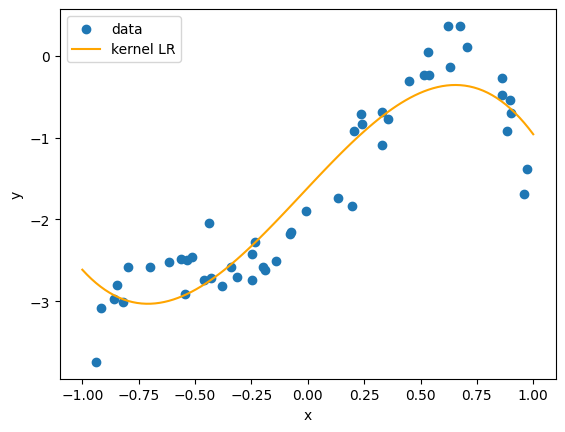

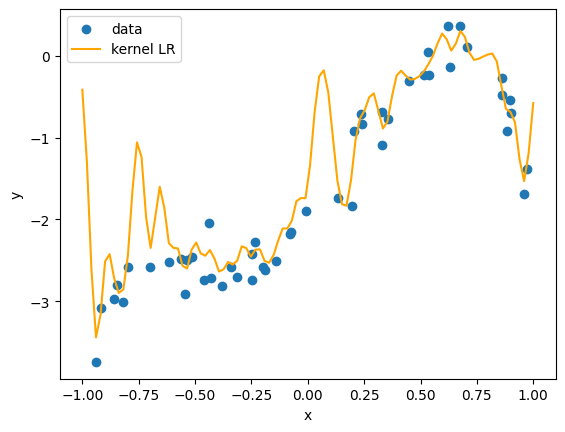

In [11]:
# Predict for interval (-1, 1)
X_pred = np.linspace(-1.0, 1.0, 100).reshape(-1,1)

l = 0.1
degree= 3
sigma = 0.03
y_pred_poly = kernel_solution(X, y, X_pred, kernel_poly, degree, l)
y_pred_gauss = kernel_solution(X, y, X_pred, kernel_gauss, sigma, l)

# Plot results
plt.scatter(X, y, label="data")
plt.plot(X_pred, y_pred_poly, c='orange', label="kernel LR")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.scatter(X, y, label="data")
plt.plot(X_pred, y_pred_gauss, c='orange', label="kernel LR")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Let's look at suitable values :

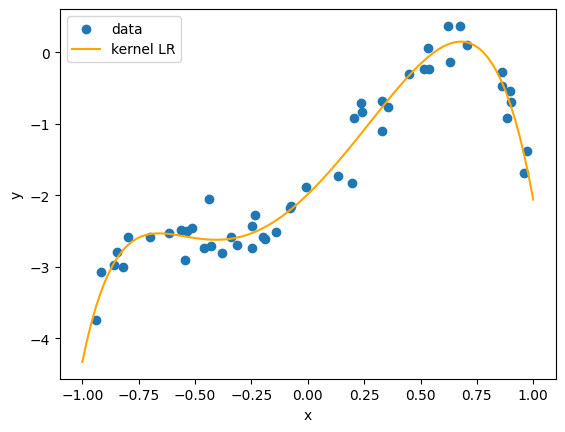

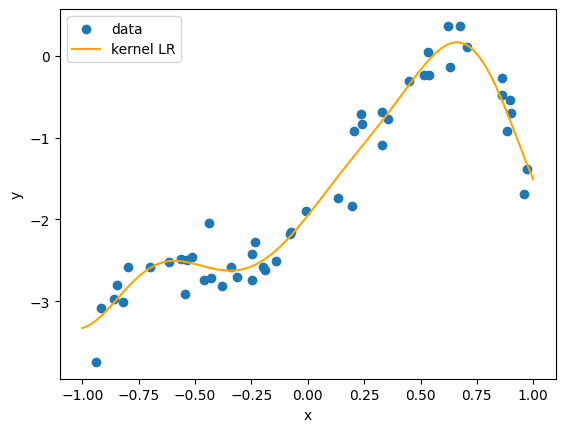

In [12]:
# Predict for interval (-1, 1)
X_pred = np.linspace(-1.0, 1.0, 100).reshape(-1,1)

l = 0.05
degree= 8
sigma = 0.3
y_pred_poly = kernel_solution(X, y, X_pred, kernel_poly, degree, l)
y_pred_gauss = kernel_solution(X, y, X_pred, kernel_gauss, sigma, l)

# Plot results
plt.scatter(X, y, label="data")
plt.plot(X_pred, y_pred_poly, c='orange', label="kernel LR")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.scatter(X, y, label="data")
plt.plot(X_pred, y_pred_gauss, c='orange', label="kernel LR")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()